In [1]:
import nonlinear_benchmarks

from matplotlib import pyplot as plt
import numpy as np

## EMPS

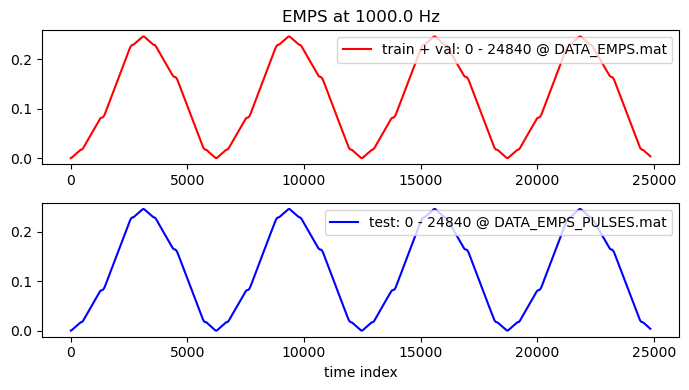

In [2]:
train_val, test = nonlinear_benchmarks.EMPS(train_test_split=True)

plt.figure(figsize=(7,4))
plt.subplot(2,1,1)
plt.title(f'EMPS at {1/train_val.sampling_time:.1f} Hz')
plt.plot(train_val.y,'r',label=f'train + val: 0 - {len(train_val)-1} @ DATA_EMPS.mat')
plt.legend(loc='upper right')
plt.subplot(2,1,2)
plt.plot(test.y,'b',label=f'test: 0 - {len(test)-1} @ DATA_EMPS_PULSES.mat')
plt.legend(loc='upper right')
plt.xlabel('time index')
plt.tight_layout()
plt.savefig('../figures/EMPS.jpg',dpi=300)
plt.show()

### CED

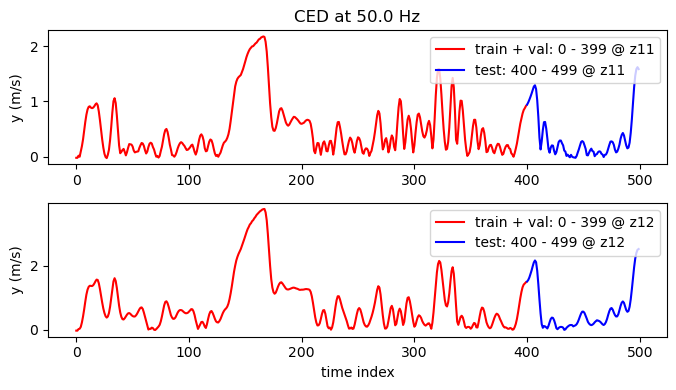

In [3]:
train_val, test = nonlinear_benchmarks.CED()


plt.figure(figsize=(7,4))
plt.subplot(2,1,1)
plt.title(f'CED at {1/train_val[0].sampling_time} Hz')
plt.plot(np.arange(400),train_val[0].y,'r',label='train + val: 0 - 399 @ z11')
plt.plot(np.arange(400,500),test[0].y,'b',label='test: 400 - 499 @ z11')
plt.ylabel('y (m/s)')
plt.legend(loc='upper right')
plt.subplot(2,1,2)
plt.plot(np.arange(400),train_val[1].y,'r',label='train + val: 0 - 399 @ z12')
plt.plot(np.arange(400,500),test[1].y,'b',label='test: 400 - 499 @ z12')
plt.ylabel('y (m/s)')
plt.legend(loc='upper right')
plt.xlabel('time index')
plt.tight_layout()
plt.savefig('../figures/CED.jpg',dpi=300)
plt.show()

## Cascaded_Tanks

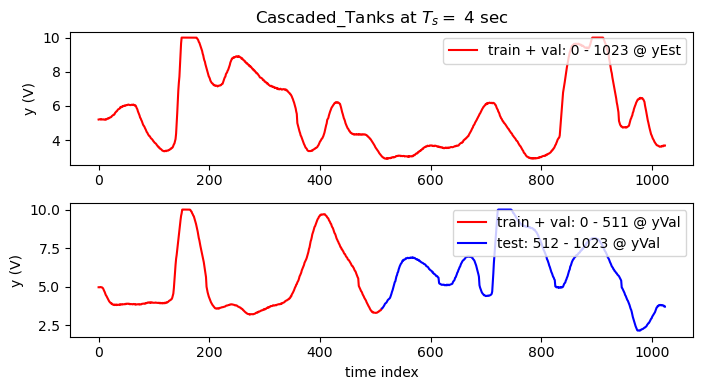

In [4]:
train_val, test = nonlinear_benchmarks.Cascaded_Tanks()

plt.figure(figsize=(7,4))
plt.subplot(2,1,1)
plt.title(f'Cascaded_Tanks at $T_s=$ {train_val[0].sampling_time} sec')
plt.plot(train_val[0].y,'r',label=f'train + val: 0 - {len(train_val[0])-1} @ yEst')
plt.ylabel('y (V)')
plt.legend(loc='upper right')
plt.subplot(2,1,2)
plt.plot(train_val[1].y,'r',label=f'train + val: 0 - {len(train_val[1])-1} @ yVal')
L, R = len(train_val[1]), len(train_val[1])+len(test)
plt.plot(np.arange(L, R), test.y,'b',label=f'test: {L} - {R-1} @ yVal')
plt.ylabel('y (V)')
plt.legend(loc='upper right')
plt.xlabel('time index')
plt.tight_layout()
plt.savefig('../figures/Cascaded_Tanks.jpg',dpi=300)
plt.show()

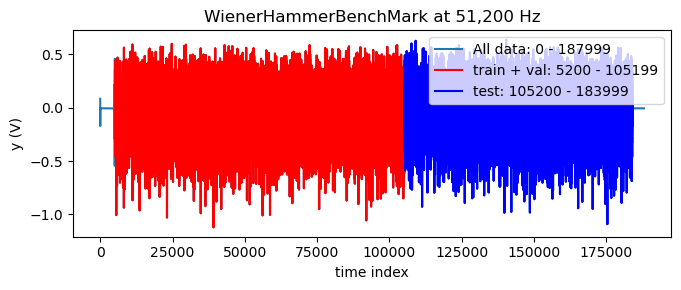

In [5]:
train_val, test = nonlinear_benchmarks.WienerHammerBenchMark()

full = nonlinear_benchmarks.WienerHammerBenchMark(train_test_split=False)

plt.figure(figsize=(7,3))
plt.plot(full.y,label=f'All data: 0 - {len(full)-1}')
plt.title(f'WienerHammerBenchMark at {1/train_val.sampling_time:,.0f} Hz')

L, R = 5200, 5200 + 100000
plt.plot(np.arange(L,R),train_val.y,'r', label=f'train + val: {L} - {R-1}')
L, R = R, R + len(test)
plt.plot(np.arange(L,R),test.y,'b', label=f'test: {L} - {R-1}')
plt.ylabel('y (V)')
plt.legend(loc='upper right')
plt.xlabel('time index')
plt.tight_layout()
plt.savefig('../figures/WienerHammerBenchMark.jpg',dpi=300)
plt.show()

## Silverbox

<Figure size 700x300 with 0 Axes>

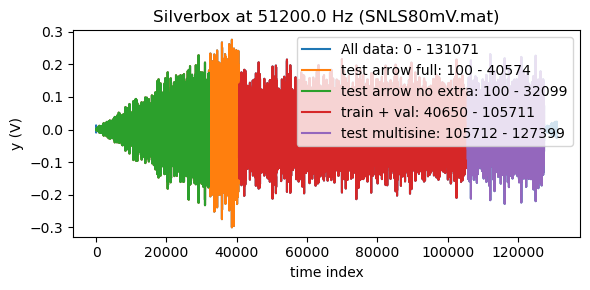

In [6]:
full = nonlinear_benchmarks.Silverbox(train_test_split=False)

multisine_train_val, multisin_test, test_arrow_full, test_arrow_no_extrapolation = nonlinear_benchmarks.Silverbox()

plt.figure(figsize=(7,3))
plt.figure(figsize=(6,3))
plt.plot(full.y,label=f'All data: 0 - {len(full)-1}')
plt.title(f'Silverbox at {1/train_val.sampling_time} Hz (SNLS80mV.mat)')

L, R = 100, 40575
plt.plot(np.arange(L,R),test_arrow_full.y, label=f'test arrow full: {L} - {R-1}')
L, R = 100, 100+32000
plt.plot(np.arange(L,R),test_arrow_no_extrapolation.y, label=f'test arrow no extra: {L} - {R-1}')
L, R = 40650, 40650 + len(multisine_train_val)
plt.plot(np.arange(L,R),multisine_train_val.y, label=f'train + val: {L} - {R-1}')
L, R = 40650 + len(multisine_train_val), 40650 + len(multisine_train_val) + len(multisin_test)
plt.plot(np.arange(L,R),multisin_test.y, label=f'test multisine: {L} - {R-1}')
plt.ylabel('y (V)')
plt.legend(loc='upper right')
plt.xlabel('time index')
plt.tight_layout()
plt.savefig('../figures/Silverbox.jpg',dpi=300)
plt.show()
